In [1]:
def mean_of_dataset(dataset):
    """Compute the mean of a numerical, multidimensional dataset."""
    sum_data = [sum(column) for column in zip(*dataset)]
    means = [sum_val / len(dataset) for sum_val in sum_data]
    return means

def sample_covariance(vector1, vector2):
    """Compute the sample covariance between two attributes."""
    mean1 = sum(vector1) / len(vector1)
    mean2 = sum(vector2) / len(vector2)
    covariance = sum((a - mean1) * (b - mean2) for a, b in zip(vector1, vector2)) / (len(vector1) - 1)
    return covariance

def correlation(vector1, vector2):
    """Compute the correlation between two attributes."""
    mean1 = sum(vector1) / len(vector1)
    mean2 = sum(vector2) / len(vector2)
    std_dev1 = (sum((x - mean1) ** 2 for x in vector1) / (len(vector1) - 1)) ** 0.5
    std_dev2 = (sum((x - mean2) ** 2 for x in vector2) / (len(vector2) - 1)) ** 0.5
    covariance = sum((a - mean1) * (b - mean2) for a, b in zip(vector1, vector2)) / (len(vector1) - 1)
    correlation = covariance / (std_dev1 * std_dev2)
    return correlation

def range_normalization(dataset):
    """Normalize the attributes in a dataset using range normalization."""
    mins = [min(column) for column in zip(*dataset)]
    maxs = [max(column) for column in zip(*dataset)]
    normalized_data = [[(x - min_val) / (max_val - min_val) for x, min_val, max_val in zip(row, mins, maxs)] for row in dataset]
    return normalized_data

def standard_normalization(dataset):
    """Normalize the attributes in a dataset using standard normalization."""
    means = [sum(column) / len(dataset) for column in zip(*dataset)]
    std_devs = [(sum((x - mean) ** 2 for x in column) / len(dataset)) ** 0.5 for mean, column in zip(means, zip(*dataset))]
    standardized_data = [[(x - mean) / std_dev for x, mean, std_dev in zip(row, means, std_devs)] for row in dataset]
    return standardized_data

def covariance_matrix(dataset):
    """Compute the covariance matrix of a dataset."""
    means = [sum(column) / len(dataset) for column in zip(*dataset)]
    cov_matrix = [[sum((row[i] - means[i]) * (row[j] - means[j]) for row in dataset) / (len(dataset) - 1) for j in range(len(means))] for i in range(len(means))]
    return cov_matrix

def label_encode(dataset):
    """Label-encode a two-dimensional categorical data array."""
    unique_vals = {val for row in dataset for val in row}
    val_to_int = {val: i for i, val in enumerate(unique_vals)}
    encoded_data = [[val_to_int[val] for val in row] for row in dataset]
    return encoded_data


In [2]:
import csv
from collections import defaultdict

def load_data(filepath):
    with open(filepath, 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        data = [row for row in reader]
    return data

def one_hot_encode(data):
    # Identify categorical columns
    categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    encoded_data = []
    encodings = {col: defaultdict(int) for col in categorical_cols}

    # Generate encodings
    for row in data:
        for col in categorical_cols:
            encodings[col][row[col]] += 1
    
    # Convert encodings to index-based encoding
    for col, mapping in encodings.items():
        encodings[col] = {key: idx for idx, key in enumerate(mapping)}
    
    # Encode data
    for row in data:
        new_row = row.copy()
        for col in categorical_cols:
            for val, idx in encodings[col].items():
                new_row[f"{col}_{val}"] = 1 if row[col] == val else 0
            del new_row[col]
        encoded_data.append(new_row)
    
    return encoded_data, encodings

data_path = 'student/student-mat.csv'
data = load_data(data_path)
encoded_data, encodings = one_hot_encode(data)

# Convert the list of dictionaries to a list of lists for numerical processing
def dict_to_list(data, encodings):
    header = sorted(list(data[0].keys()))
    return [header] + [[row[col] for col in header] for row in data]

# Convert encoded data to a list of lists
encoded_data_list = dict_to_list(encoded_data, encodings)
print(encoded_data_list[0])

['Dalc', 'Fedu', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'G1', 'G2', 'G3', 'Medu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Pstatus_A', 'Pstatus_T', 'Walc', 'absences', 'activities_no', 'activities_yes', 'address_R', 'address_U', 'age', 'failures', 'famrel', 'famsize_GT3', 'famsize_LE3', 'famsup_no', 'famsup_yes', 'freetime', 'goout', 'guardian_father', 'guardian_mother', 'guardian_other', 'health', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'nursery_no', 'nursery_yes', 'paid_no', 'paid_yes', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'romantic_no', 'romantic_yes', 'school_GP', 'school_MS', 'schoolsup_no', 'schoolsup_yes', 'sex_F', 'sex_M', 'studytime', 'traveltime']


In [3]:
# Assuming `encoded_data_filled` from the previous step is the input data
def convert_to_numeric(data):
    # Skip header and convert data rows to numeric values
    return [[float(value) for value in row] for row in data[1:]]

def compute_multivariate_mean(data):
    numeric_data = convert_to_numeric(data)
    return mean_of_dataset(numeric_data)

def compute_covariance_matrix(data):
    numeric_data = convert_to_numeric(data)
    return covariance_matrix(numeric_data)

def get_attribute_names(data, pair):
    """
    Given a pair of attribute indexes and the data (including headers),
    return the column headers for those attributes.
    """
    header = data[0]  # The first row contains the column headers
    attribute_names = (header[pair[0]], header[pair[1]])
    
    return attribute_names

# Compute multivariate mean
multivariate_mean = compute_multivariate_mean(encoded_data_list)
# print("Multivariate Mean:", multivariate_mean)

# Compute covariance matrix
cov_matrix = compute_covariance_matrix(encoded_data_list)
# print("Covariance Matrix:", cov_matrix)

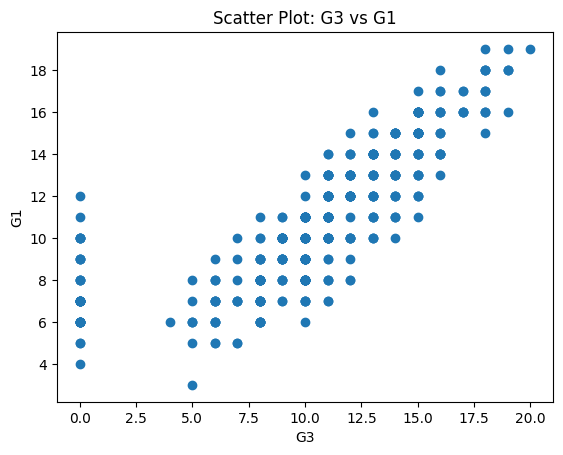

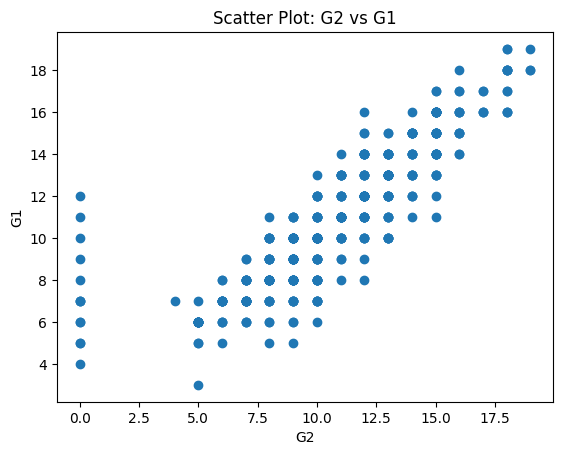

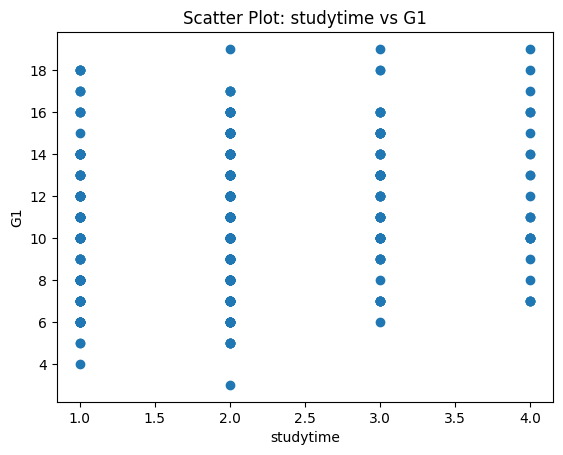

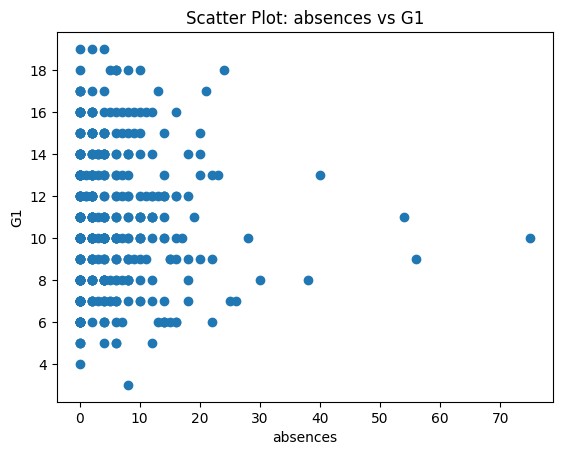

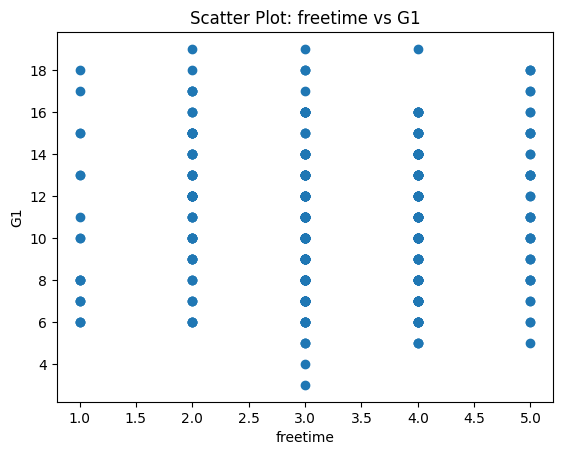

In [4]:
import matplotlib.pyplot as plt

def plot_scatter_pairs(data, pairs):
    numeric_data = convert_to_numeric(data)
    header = data[0]

    for pair in pairs:
        idx1, idx2 = header.index(pair[0]), header.index(pair[1])
        x = [row[idx1] for row in numeric_data]
        y = [row[idx2] for row in numeric_data]

        plt.figure()
        plt.scatter(x, y)
        plt.title(f"Scatter Plot: {pair[0]} vs {pair[1]}")
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.show()

# Define pairs for scatter plots
pairs = [("G3", "G1"), ("G2", "G1"), ("studytime", "G1"), ("absences", "G1"), ("freetime", "G1")]

# Plot scatter pairs
plot_scatter_pairs(encoded_data_list, pairs)  #uncomment to see graphs :)

In [5]:
def find_greatest_sample_covariance(data):
    numeric_data = convert_to_numeric(data)
    range_normalized_data = range_normalization(numeric_data)
    # Assume you've identified two attributes of interest; you would compute their indices and use them here
    # For demonstration, let's say indices 0 and 1 represent those attributes
    cov = sample_covariance([row[0] for row in range_normalized_data], [row[1] for row in range_normalized_data])
    return cov

# Example usage
greatest_covariance = find_greatest_sample_covariance(encoded_data_list)
print("Greatest Sample Covariance:", greatest_covariance)

Greatest Sample Covariance: 0.00014457366831587798


In [6]:
def z_score_normalize(data):
    numeric_data = convert_to_numeric(data)
    return standard_normalization(numeric_data)

def find_greatest_correlation(data):
    normalized_data = z_score_normalize(data)
    n = len(normalized_data[0])
    greatest_correlation = 0
    pair = (0, 1)
    for i in range(n):
        for j in range(i + 1, n):
            corr = correlation([row[i] for row in normalized_data], [row[j] for row in normalized_data])
            if abs(corr) > abs(greatest_correlation):
                greatest_correlation = corr
                pair = (i, j)
    return pair, greatest_correlation

normalized_data = z_score_normalize(encoded_data_list)
pair, greatest_correlation = find_greatest_correlation(encoded_data_list)
print(f"Greatest Correlation: {greatest_correlation} between attributes {pair}")

attribute_names = get_attribute_names(encoded_data_list, pair)
print(f"Attribute Names for Pair {pair}: {attribute_names[0]} and {attribute_names[1]}")

Greatest Correlation: -1.0000000000000002 between attributes (22, 23)
Attribute Names for Pair (22, 23): address_R and address_U


In [7]:
def find_smallest_correlation(data):
    normalized_data = z_score_normalize(data)
    n = len(normalized_data[0])
    smallest_correlation = 1  # Start with the maximum possible correlation
    pair = (0, 1)
    for i in range(n):
        for j in range(i + 1, n):
            corr = correlation([row[i] for row in normalized_data], [row[j] for row in normalized_data])
            if abs(corr) < abs(smallest_correlation):
                smallest_correlation = corr
                pair = (i, j)
    return pair, smallest_correlation

pair, smallest_correlation = find_smallest_correlation(encoded_data_list)
print(f"Smallest Correlation: {smallest_correlation} between attributes {pair}")

attribute_names = get_attribute_names(encoded_data_list, pair)
print(f"Attribute Names for Pair {pair}: {attribute_names[0]} and {attribute_names[1]}")

Smallest Correlation: -8.102234019729828e-05 between attributes (15, 46)
Attribute Names for Pair (15, 46): Mjob_teacher and reason_home


In [8]:
def count_high_correlations(data, threshold=0.5):
    normalized_data = z_score_normalize(data)
    n = len(normalized_data[0])
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            corr = correlation([row[i] for row in normalized_data], [row[j] for row in normalized_data])
            if abs(corr) >= threshold:
                count += 1
    return count

high_corr_count = count_high_correlations(encoded_data_list)
print(f"Number of feature pairs with correlation >= 0.5: {high_corr_count}")

Number of feature pairs with correlation >= 0.5: 20


In [9]:
def count_negative_covariances(data):
    numeric_data = convert_to_numeric(data)
    n = len(numeric_data[0])
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            cov = sample_covariance([row[i] for row in numeric_data], [row[j] for row in numeric_data])
            if cov < 0:
                count += 1
    return count

negative_cov_count = count_negative_covariances(encoded_data_list)
print(f"Number of feature pairs with negative sample covariance: {negative_cov_count}")

Number of feature pairs with negative sample covariance: 884


In [10]:
def calculate_total_variance(data):
    cov_matrix = compute_covariance_matrix(data)
    total_variance = sum(cov_matrix[i][i] for i in range(len(cov_matrix)))
    return total_variance

total_variance = calculate_total_variance(encoded_data_list)
print(f"Total Variance of the data: {total_variance}")

Total Variance of the data: 130.42906894557603


In [11]:
def calculate_total_variance_top_features(data, top_n=5):
    numeric_data = convert_to_numeric(data)
    variances = [sample_variance([row[i] for row in numeric_data]) for i in range(len(numeric_data[0]))]
    top_variances = sorted(variances, reverse=True)[:top_n]
    return sum(top_variances)

# Sample variance function needed for the above code, assuming it's implemented similarly to other statistical functions provided earlier
def sample_variance(vector):
    mean = sum(vector) / len(vector)
    variance = sum((x - mean) ** 2 for x in vector) / (len(vector) - 1)
    return variance

total_variance_top_features = calculate_total_variance_top_features(encoded_data_list)
print(f"Total Variance of the top 5 features: {total_variance_top_features}")

Total Variance of the top 5 features: 112.13807106598983
